# Assignment 3.2

# Sequence classification model

In [1]:
from __future__ import print_function

## 1. Preprocess data

#### Tasks:

* Create word vocabulary index (use 10.000 most frequent words)
* Preprocess training and validation set for model input. Use vocabulary index as lookup dictionary to transform raw text into integer sequences. You may use code from Practical 5.

In [76]:
import os
import sys
import numpy as np
import pandas as pd
import re
import nltk

from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Input, Dropout, Lambda, LSTM, GRU, Bidirectional
from keras.utils import HDF5Matrix
import keras.callbacks

import tensorflow as tf

import matplotlib.pyplot as plt

C:\Users\s134277\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


In [116]:
#### USE FOR JUPYTER NOTEBOOK
DATA_PATH = "data"
MODEL_PATH = "models"

# YOUR CODE HERE 
words_indices_nparray = np.load(os.path.join(DATA_PATH,'words_indices.npy'))
words_indices = dict(np.ndarray.tolist(words_indices_nparray))
# In words_indices, the 10000 most common words are stored, together with '<start>' (10001), '<end>' (10002) and '<unk>'(100003)
# '<unk>' means original word did not belong to 10000 most common ones

indices_words_nparray = np.load(os.path.join(DATA_PATH,'indices_words.npy'))
indices_words = dict(np.ndarray.tolist(indices_words_nparray))

# provide model inputs (sequences from training and validation set) and outputs (sentiment labels)
X_train = np.load(os.path.join(DATA_PATH, "X_train_word.npy"))
Y_train = np.load(os.path.join(DATA_PATH, "Y_train_word.npy"))
X_validation = np.load(os.path.join(DATA_PATH, "X_valid_word.npy"))
Y_validation = np.load(os.path.join(DATA_PATH, "Y_valid_word.npy"))

#trim train and validation samples to speed up training
X_train = X_train[:5000]
Y_train = Y_train[:5000]

X_validation = X_validation[5000:6000]
Y_validation = Y_validation[5000:6000]

## 2. Sequence classification model

#### Tasks: 

* Create a RNN model to classify sequence of words on a binary classification task
* Compare four (4) different gate memory units
* Plot model performance (loss and accuracy) of these 4 models
* Present the performance (loss and accuarcy) of these 4 models in a comparison table

In [6]:
# YOUR CODE HERE
num_words = len(words_indices)
max_sequence_length = 500
rnn_dim = 32

def binarize(x, sz=num_words):
    return tf.to_float(tf.one_hot(x, sz, on_value=1, off_value=0, axis=-1))

def binarize_outshape(in_shape):
    return in_shape[0], in_shape[1], num_words

# decide number of epochs and batch_size (used same settings as in practical 5.2)
num_epochs = 5 
batch_size = 64 

### Model 1 : LSTM

In [7]:
# YOUR CODE HERE
### MODEL-1: LSTM

# construct architecture
input_layer = Input(shape=(max_sequence_length, ), name='input_layer', dtype='int32')
word_embedding = Lambda(binarize, output_shape=binarize_outshape,name='word_embedding')(input_layer)
lstm_layer = LSTM(rnn_dim, name='lstm_layer')(word_embedding)
output_layer = Dense(1, name='prediction_layer', activation='sigmoid')(lstm_layer)

# define and load model
lstm_model = Model(inputs=input_layer, outputs=output_layer)

print("LSTM model: ")
lstm_model.summary()


### MODEL-2: GRU

# construct the model
input_layer = Input(shape=(max_sequence_length, ), name='input_layer', dtype='int32')
word_embedding = Lambda(binarize, output_shape=binarize_outshape,name='word_embedding')(input_layer)
gru_layer = GRU(rnn_dim, name='gru_layer')(word_embedding)
output_layer = Dense(1, name='prediction_layer', activation='sigmoid')(gru_layer)

# define and load model
gru_model = Model(inputs=input_layer, outputs=output_layer)
print("GRU model: ")
gru_model.summary()


### MODEL-3: Bidirectional LSTM

# construct architecture
input_layer = Input(shape=(max_sequence_length, ), name='input_layer', dtype='int32')
word_embedding = Lambda(binarize, output_shape=binarize_outshape,name='word_embedding')(input_layer)
bilstm_layer = Bidirectional(LSTM(rnn_dim, name='bilstm_layer'))(word_embedding)
output_layer = Dense(1, name='prediction_layer', activation='sigmoid')(bilstm_layer)

# define and load model
bilstm_model = Model(inputs=input_layer, outputs=output_layer)
print("Bilateral LSTM model: ")
bilstm_model.summary()


### MODEL-4: Bidirectional GRU

# construct the model
input_layer = Input(shape=(max_sequence_length, ), name='input_layer', dtype='int32')
word_embedding = Lambda(binarize, output_shape=binarize_outshape,name='word_embedding')(input_layer)
bigru_layer = Bidirectional(GRU(rnn_dim, name='gru_layer'))(word_embedding)
output_layer = Dense(1, name='prediction_layer', activation='sigmoid')(bigru_layer)

# define and load model
bigru_model = Model(inputs=input_layer, outputs=output_layer)
print("Bilateral GRU model: ")
bigru_model.summary()

LSTM model: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 500)               0         
_________________________________________________________________
word_embedding (Lambda)      (None, 500, 10004)        0         
_________________________________________________________________
lstm_layer (LSTM)            (None, 32)                1284736   
_________________________________________________________________
prediction_layer (Dense)     (None, 1)                 33        
Total params: 1,284,769
Trainable params: 1,284,769
Non-trainable params: 0
_________________________________________________________________
GRU model: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 500)               0         
_________________________________________

### Compile models

In [8]:
# YOUR CODE HERE 
# decide loss function, and optimizer
lstm_model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

gru_model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

bilstm_model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

bigru_model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])


### Train, save (both models and weight parameters) and plot (loss, accuracy) models

In [0]:
# # Install the PyDrive wrapper & import libraries.
# # This only needs to be done once in a notebook.
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# # This only needs to be done once in a notebook.

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)


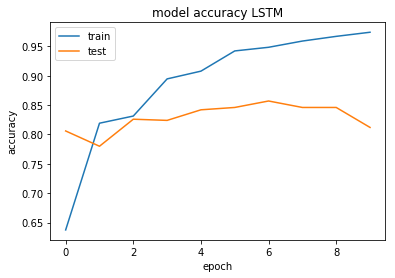

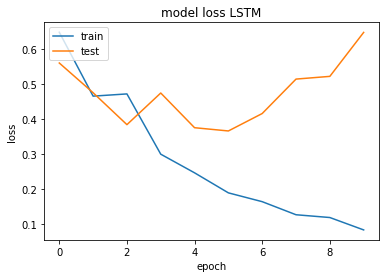

Validation accuracy: [0.8059999995231628, 0.7800000009536743, 0.8260000004768372, 0.8239999995231628, 0.8419999990463257, 0.846, 0.8570000009536743, 0.8459999995231628, 0.8459999995231628, 0.812]
Test loss: [0.5611014280319214, 0.47582620906829837, 0.384276153087616, 0.4750414047241211, 0.375505645275116, 0.366185742855072, 0.4161798710823059, 0.5149682664871216, 0.5227613372802734, 0.6488782725334168]


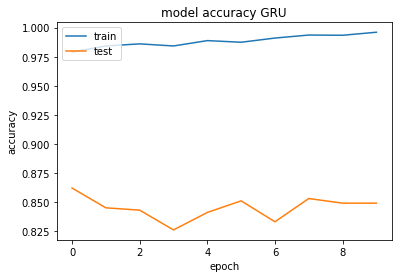

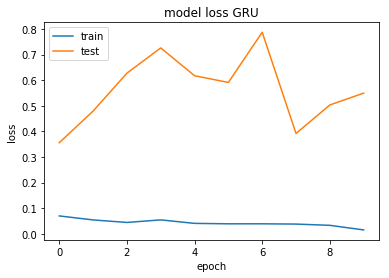

Validation accuracy: [0.8619999990463257, 0.8450000004768372, 0.8430000009536743, 0.826, 0.8410000009536743, 0.8509999995231629, 0.8330000004768372, 0.853, 0.8490000004768372, 0.8490000004768372]
Test loss: [0.3557331118583679, 0.47925200510025023, 0.6273456172943115, 0.7260665321350097, 0.6173557367324829, 0.591126778125763, 0.7873389215469361, 0.39169568490982054, 0.5031302800178528, 0.5493622488975525]


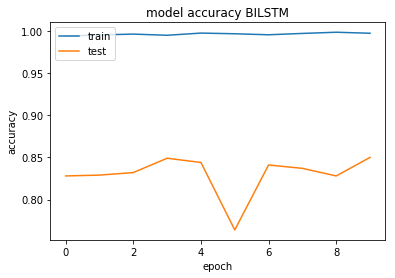

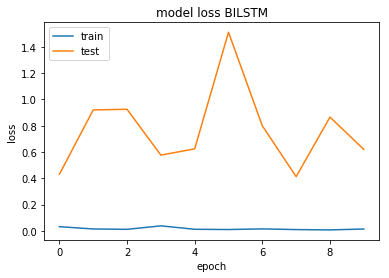

Validation accuracy: [0.8279999995231628, 0.8290000004768372, 0.8319999995231628, 0.849, 0.844, 0.7639999990463257, 0.841, 0.8369999995231628, 0.8280000009536743, 0.85]
Test loss: [0.4305894093513489, 0.9204332008361816, 0.9248511257171631, 0.5760876803398133, 0.62373597240448, 1.5114643869400024, 0.7988615427017212, 0.4120773310661316, 0.8655275192260742, 0.6197830848693847]


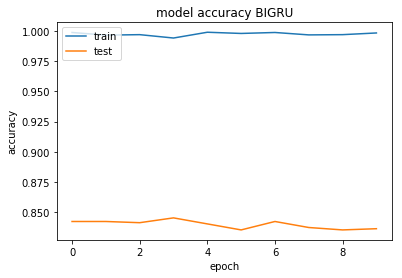

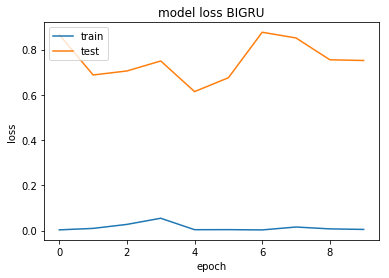

Validation accuracy: [0.8419999990463257, 0.842, 0.841, 0.8449999990463257, 0.8400000009536743, 0.8350000009536743, 0.8420000009536743, 0.8370000009536743, 0.835, 0.8360000009536743]
Test loss: [0.8657569408416748, 0.6877984733581542, 0.7054545459747315, 0.7496133050918579, 0.614334436416626, 0.6754526481628418, 0.87658473777771, 0.8513175411224365, 0.7549312515258789, 0.7517511749267578]


In [9]:
models = [(lstm_model, 'LSTM', 'lstm_model.h5', 'weights_lstm_model.hdf5'), 
          (gru_model, 'GRU', 'gru_model.h5', 'weights_gru_model.hdf5'), 
          (bilstm_model, 'BILSTM', 'bilstm_model.h5', 'weights_bilstm_model.hdf5'), 
          (bigru_model, 'BIGRU', 'bigru_model.h5', 'weights_bigru_model.hdf5')]

for nn_model, modelname, save_name, save_weights_name in models:
  model = lstm_model
# Fit the model
  history = model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), \
               epochs=10, batch_size=batch_size, verbose = 0)
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy '+ modelname)
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss ' + modelname)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  #plt.ylim()
  plt.show()
  
  #save model and trained weight parameters
  model.save(os.path.join(MODEL_PATH, save_name))
  model.save_weights(os.path.join(MODEL_PATH, save_weights_name))
  
  #print validation accuracy and test loss
  print("Validation accuracy: {}".format(history.history['val_acc']))
  print("Test loss: {}".format(history.history['val_loss']))
  
#   # Create & upload a file.
#   uploaded = drive.CreateFile({'title': save_name})
#   uploaded.SetContentFile(save_name)
#   uploaded.Upload()
#   print('Uploaded file with ID {}'.format(uploaded.get('id')))

#   uploaded = drive.CreateFile({'title': save_weights_name})
#   uploaded.SetContentFile(save_weights_name)
#   uploaded.Upload()
#   print('Uploaded file with ID {}'.format(uploaded.get('id')))
  
  

In [32]:
val_acc_LSTM = [0.8059999995231628, 0.7800000009536743, 0.8260000004768372, 0.8239999995231628, 0.8419999990463257, 0.846, 0.8570000009536743, 0.8459999995231628, 0.8459999995231628, 0.812]
test_loss_LSTM =  [0.5611014280319214, 0.47582620906829837, 0.384276153087616, 0.4750414047241211, 0.375505645275116, 0.366185742855072, 0.4161798710823059, 0.5149682664871216, 0.5227613372802734, 0.6488782725334168]

val_acc_GRU = [0.8619999990463257, 0.8450000004768372, 0.8430000009536743, 0.826, 0.8410000009536743, 0.8509999995231629, 0.8330000004768372, 0.853, 0.8490000004768372, 0.8490000004768372]
test_loss_GRU =[0.3557331118583679, 0.47925200510025023, 0.6273456172943115, 0.7260665321350097, 0.6173557367324829, 0.591126778125763, 0.7873389215469361, 0.39169568490982054, 0.5031302800178528, 0.5493622488975525]

val_acc_BILSTM = [0.8279999995231628, 0.8290000004768372, 0.8319999995231628, 0.849, 0.844, 0.7639999990463257, 0.841, 0.8369999995231628, 0.8280000009536743, 0.85]
test_loss_BILSTM = [0.4305894093513489, 0.9204332008361816, 0.9248511257171631, 0.5760876803398133, 0.62373597240448, 1.5114643869400024, 0.7988615427017212, 0.4120773310661316, 0.8655275192260742, 0.6197830848693847]

val_acc_BIGRU = [0.8419999990463257, 0.842, 0.841, 0.8449999990463257, 0.8400000009536743, 0.8350000009536743, 0.8420000009536743, 0.8370000009536743, 0.835, 0.8360000009536743]
test_loss_BIGRU = [0.8657569408416748, 0.6877984733581542, 0.7054545459747315, 0.7496133050918579, 0.614334436416626, 0.6754526481628418, 0.87658473777771, 0.8513175411224365, 0.7549312515258789, 0.7517511749267578]

val_acc_LSTM_r = [ '%.2f' % elem for elem in val_acc_LSTM ]
test_loss_LSTM_r = [ '%.2f' % elem for elem in test_loss_LSTM ]
val_acc_GRU_r = [ '%.2f' % elem for elem in val_acc_GRU ]
test_loss_GRU_r = [ '%.2f' % elem for elem in test_loss_GRU ]
val_acc_BILSTM_r = [ '%.2f' % elem for elem in val_acc_BILSTM ]
test_loss_BILSTM_r = [ '%.2f' % elem for elem in test_loss_BILSTM ]
val_acc_BIGRU_r = [ '%.2f' % elem for elem in val_acc_BIGRU ]
test_loss_BIGRU_r = [ '%.2f' % elem for elem in test_loss_BIGRU ]

print('Accuracy LSTM {}'.format(val_acc_LSTM_r))
print('Accuracy GRU {}'.format(val_acc_GRU_r))
print('Accuracy BILSTM {}'.format(val_acc_BILSTM_r))
print('Accuracy BIGRU {}'.format(val_acc_BIGRU_r))

print('Test loss LSTM {}'.format(test_loss_LSTM_r))
print('Test loss GRU {}'.format(test_loss_GRU_r))
print('Test loss BILSTM {}'.format(test_loss_BILSTM_r))
print('Test loss  BIGRU {}'.format(test_loss_BIGRU_r))

Accuracy LSTM ['0.81', '0.78', '0.83', '0.82', '0.84', '0.85', '0.86', '0.85', '0.85', '0.81']
Accuracy GRU ['0.86', '0.85', '0.84', '0.83', '0.84', '0.85', '0.83', '0.85', '0.85', '0.85']
Accuracy BILSTM ['0.83', '0.83', '0.83', '0.85', '0.84', '0.76', '0.84', '0.84', '0.83', '0.85']
Accuracy BIGRU ['0.84', '0.84', '0.84', '0.84', '0.84', '0.84', '0.84', '0.84', '0.83', '0.84']
Test loss LSTM ['0.56', '0.48', '0.38', '0.48', '0.38', '0.37', '0.42', '0.51', '0.52', '0.65']
Test loss GRU ['0.36', '0.48', '0.63', '0.73', '0.62', '0.59', '0.79', '0.39', '0.50', '0.55']
Test loss BILSTM ['0.43', '0.92', '0.92', '0.58', '0.62', '1.51', '0.80', '0.41', '0.87', '0.62']
Test loss  BIGRU ['0.87', '0.69', '0.71', '0.75', '0.61', '0.68', '0.88', '0.85', '0.75', '0.75']


In [73]:
import toyplot.data
import numpy

# data = dict()
# data["Name"] = ["Tim", "Fred", "Jane"]
# data["Age"] = [45, 32, 43]
# toyplot.data.Table(data)
import collections
accuracy = collections.OrderedDict()
loss = collections.OrderedDict()
epochs = []
accuracy["Model"] = ["LSTM", "GRU", "BILSTM", "BIGRU"]
loss["Model"] = ["LSTM", "GRU", "BILSTM", "BIGRU"]
for i in range (0,10):
    epoch = ['Epoch'+str(i)]
    accuracy['Epoch'+str(i)] = [val_acc_LSTM_r[i], val_acc_GRU_r[i], val_acc_BILSTM_r[i], val_acc_BIGRU_r[i]]
    loss['Epoch'+str(i)] = [test_loss_LSTM_r[i], test_loss_GRU_r[i], test_loss_BILSTM_r[i], test_loss_BIGRU_r[i]]

print("Accuracy table")
toyplot.data.Table(accuracy)

Accuracy table


In [74]:
print("Loss table")
toyplot.data.Table(loss)

Loss table


Interestingly, all different RNN layers give similar results: at some point, the highest accuracy obtained in the ten epochs lies for all layers in the range [0.84, 0.86]. For this task, all models, except the LSTM model, strongly overfit from the beginning: for all three models, the training accuracy is very high in the beginning and the training losses for these models are very low. The LSTM also start overfitting at a certain point: in the LSTM model, the test accuracy increases up to epoch 6 and then decreases, while the training accuracy consistently increases.

The test accuracy after ten epochs are the highest for the GRU layer and the BILSTM layer. As the GRU layer is also the least complex model, it is also a desirable layer for computational purposes. As the GRU layer performs best after 10 epochs and is the least complex, we will use this layer for the next question.

### 3. Feature extraction

#### Tasks: 

* Choose one model with the best performance and use the model to produce ”neural codes” (document embedding) of raw text (5000 instances of unseen validation set) from RNN layer.
*  Use tSNE to reduce the dimension of extracted text features (encoded version of 5000 documents) into two (2) dimensions and visualize it towards their sentiment labels.


In [108]:
# load the trained model
from keras.models import load_model

# YOUR CODE HERE
# choose the best model

model = load_model(os.path.join(MODEL_PATH, 'gru_model.h5'), custom_objects={"tf": tf, "num_words": 10004})
# model.load_weights('')

#### Produce Neural codes of text reviews

In [109]:
X_validation = np.load(os.path.join(DATA_PATH, "X_valid_word.npy"))
Y_validation = np.load(os.path.join(DATA_PATH, "Y_valid_word.npy"))

#trim train and validation samples to speed up training
X_validation_new = X_validation[6000:11000]
Y_validation_new = Y_validation[6000:11000]

In [110]:
# YOUR CODE HERE
model = Model(inputs = model.input, outputs = model.get_layer("lstm_layer").output)

# define sub model to retrieve "neural codes" (document embedding) from recurrent layer
encoder_model = model

# generate "neural codes" (document embedding) from the model
doc_embedding =encoder_model.predict(X_validation_new)

#### tSNE visualization

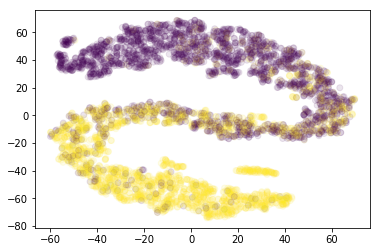

In [111]:
# YOUR CODE HERE
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
# use tSNE to plot document embedding on its sentiment label
tsne = TSNE(n_components=2, random_state=0)
doc_embedding_tsne = tsne.fit_transform(doc_embedding)

# use tSNE to plot document embedding on its sentiment label
x_axis = doc_embedding_tsne[:,0]
y_axis = doc_embedding_tsne[:,1]

plt.scatter(x_axis, y_axis, c=Y_validation_new, alpha= 0.1)

### 4. One shot learning on multi-class classification

#### Tasks: 

* Use the RNN model that has been trained on binary classification task to extract features from different data set (Amazon product reviews)
* Define and implement an approach to assign labels on unlabelled set of reviews, by using the concept of "one shot learning"
* Compute accuracy, given ground truth labels
* Discuss the results 

Explain how the approach works.


#### Answer:
First, the Amazon data was preprocessed using the code in Practical 5.1. The only change in the standard practical code we made was that the documents were tokenized using the vocabulary of the IMDB data instead of the vocabulary of the Amazon data. This was necessary in order to use the IMDB model. 

After preprocessing, we produced neural codes for the training examples (example1_labelled) and for the validation examples (example2_labelled). Then, for every validation example, we computed the L1-distance between its neural code and the three neural codes computed from example1_labelled. The label corresponding to the training example with the smallest distance with the validation example was used to predict the label of the validation example. This predicted label was compared to the true label of the validatione example. The accuracy over the validation set was then computed by summing up the amount of times the predicted label was equal to the true label and dividing this by the amount of validation examples.



In [147]:
# YOUR CODE HERE
from scipy.spatial.distance import cityblock

DATA_AMAZON_PATH = "amazon_data"
amazon_X_train = np.load(os.path.join(DATA_AMAZON_PATH, "X_train_word.npy"))
amazon_Y_train = np.load(os.path.join(DATA_AMAZON_PATH, "Y_train_word.npy"))

amazon_X_val = np.load(os.path.join(DATA_AMAZON_PATH, "X_valid_word.npy"))
amazon_Y_val = np.load(os.path.join(DATA_AMAZON_PATH, "Y_valid_word.npy"))

#Generate "neural codes" (document embedding) from the model for the train and validation samples
doc_embedding_classes =encoder_model.predict(amazon_X_train)
# one shot learning task
doc_embedding_val =encoder_model.predict(amazon_X_val)

# compute overall accuracy, given ground truth labels
accuracy = 0
for i in range (0, len(doc_embedding_val)):
    val = doc_embedding_val[i]
    min_distance = 1000
    for j in range (0, len(doc_embedding_classes)):
        distance = cityblock(doc_embedding_classes[j],doc_embedding_val[i] )
        if distance < min_distance:
            min_distance = distance
            pred_label = amazon_Y_train[j]
    if pred_label == amazon_Y_val[i]:
        accuracy += 1
accuracy = accuracy / len(doc_embedding_val)
print(accuracy)

0.2857142857142857


Discuss the result. Why it works -- or why it does not work.

#### Answer:

The obtained accuracy was 0.29. Thus, the predicted labels seemed to be random. This is no surprise: the task in the assignemnt 2.1 is completely different from the task here. In assignment 2.1, one would like the model to focus on words indicating sentiment, while here, the sentiment is completely irrelevant. For this task, the model should focus on words like "camera", "phone", "laptop" or synonyms of this words. This is difficult with the model trained for sentiment analysis, especially since the vocabulary of this model does not even contain the word "laptop".